## 8_1.主成分分析

In [11]:
from sklearn import datasets
import pandas as pd

# irisデータセットを読み込む
dataset = datasets.load_iris()
# カラム名のリストを取得
feature_names = dataset.feature_names
print('feature_names:', feature_names)

# カラムのデータを取得してデータの形状を出力
features = dataset.data
print('fature.shape:', features.shape)

# ターゲットのリストを取得して内容を出力
target_names = dataset.target_names
print('target_names:', target_names)

# ターゲット（正解値）を取得してデータの形状を出力
targets = dataset.target
print('targets.shapes:', targets.shape)

# irisデータからデータフレームを作成し，ターゲットデータを列末尾に追加
df = pd.DataFrame(features, columns=feature_names)
df['target'] = target_names[targets]
# データフレームの先頭部分を出力
df.head()

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
fature.shape: (150, 4)
target_names: ['setosa' 'versicolor' 'virginica']
targets.shapes: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データを標準化
x_scaled = StandardScaler().fit_transform(features)
# 主成分分析を行うPCAモデルを生成
pca = PCA()
# fit()メソッドで主成分得点を取得
pca.fit(x_scaled)

# 第１主成分〜第４主成分をデータフレームに格納して出力
print(pd.DataFrame(
    pca.components_,   # compornents_で主成分を取得
    columns=feature_names # カラム名
))
print('-------------------------------')

# 各主成分の寄与率を出力
print('各主成分の寄与率:', pca.explained_variance_ratio_)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.521066         -0.269347           0.580413          0.564857
1           0.377418          0.923296           0.024492          0.066942
2          -0.719566          0.244382           0.142126          0.634273
3          -0.261286          0.123510           0.801449         -0.523597
-------------------------------
各主成分の寄与率: [0.72962445 0.22850762 0.03668922 0.00517871]


主成分得点の形状: (150, 2)
-----------------------------
          0         1
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835


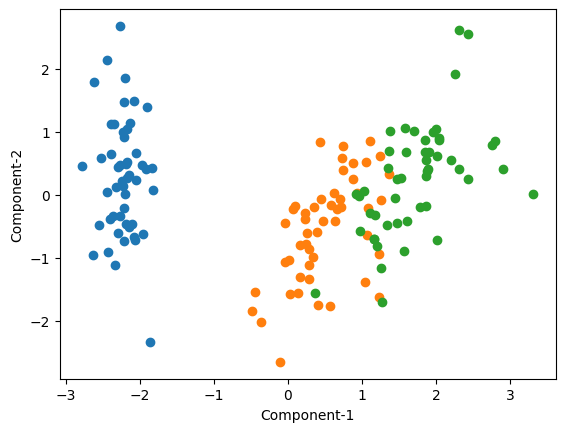

In [15]:
import matplotlib.pyplot as plt

# 主成分の数を２にしてPCAモデルを生成
pca = PCA(n_components=2)
# fit()メソッドで主成分得点を取得
x_trainsformed = pca.fit_transform(x_scaled)
print('主成分得点の形状:', x_trainsformed.shape)
print('-----------------------------')

# 次元削減後の主成分得点をデータフレームに出力
print(pd.DataFrame(x_trainsformed).head())

# Figure,Axesを生成
fig, ax = plt.subplots()
# ターゲット（正解）ごとに主成分得点のリストを作成
# 第1要素は，第１主成分の得点，第2要素は第２主成分の得点
x0 = x_trainsformed[targets==0] # 正解が０の主成分得点
x1 = x_trainsformed[targets==1] # 正解が1の主成分得点
x2 = x_trainsformed[targets==2] # 正解が2の主成分得点

# 正解が０〜２それぞれの第１主成分得点をx軸，第２主成分をy軸に設定
ax.scatter(x0[:, 0], x0[:, 1])  # 正解が0
ax.scatter(x1[:, 0], x1[:, 1])  # 正解が1
ax.scatter(x2[:, 0], x2[:, 1])  # 正解が2

ax.set_xlabel('Component-1')   # 第１主成分をx軸ラベル
ax.set_ylabel('Component-2')   # 第2主成分をy軸ラベル

plt.show()